## Build Artificial Neural Network (ANN) based on raw image data from Ali Express

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import pandas as pd
import numpy as np
from numpy import load

from functools import partial

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

Load in the Ali Express image dataset and labels

In [6]:
ali_image_data = load("/content/drive/MyDrive/ADS_504_machine_learning/group_project/stored_data/raw_image_data.npy")
ali_image_labels = load("/content/drive/MyDrive/ADS_504_machine_learning/group_project/stored_data/raw_image_labels.npy")

Because the Ali Express labels are words, e.g. "dress" and "trouser," we need to convert them into numbers.

There are multiple categories being labeled with the number "10" because the fashion-MNIST dataset only has labels for 0 - 9

In [8]:
transdict = {'tshirt' : 0, 'trouser' : 1,
 'pullover' : 2,  'dress' : 3,
 'coat' : 4,     'sandal' : 5,
 'shirt' : 6,  'sneaker' : 7,
 'bag' : 8,  'boot' : 9,
 'sunglasses' : 10, 'socks' : 10,
 'belt' : 10, 'hat' : 10,
 'shorts' : 10, 'polo' : 6,
 'underwear' : 10
}

ali_cleaned_labels = np.array([ transdict[item] for item in ali_image_labels])

Now we drop the training images that correspond with label = 10

In [9]:
drop_index = np.where(ali_cleaned_labels==10)

ali_image_data = np.delete(ali_image_data, drop_index, axis=0)
ali_cleaned_labels = np.delete(ali_cleaned_labels, drop_index, axis=0)

Pull in the fashion-MNIST training and testing dataset, perform light preprocessing to prepare data for the CNN.

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

train_images = tf.image.resize(train_images, [64, 64])
test_images = tf.image.resize(test_images, [64, 64])

train_images = np.squeeze(train_images)
test_images = np.squeeze(test_images)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images = train_images / 255
test_images = test_images / 255

### Build the ANN model

This model comes directly from Tensorflow documentation for ANNs: https://www.tensorflow.org/tutorials/keras/classification

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (64,64)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(ali_image_data, ali_cleaned_labels, epochs=15,
                    validation_data=(test_images, test_labels))

Epoch 1/15
1101/1101 [==============================] - 12s 5ms/step - loss: 2.1524 - accuracy: 0.2166 - val_loss: 2.4082 - val_accuracy: 0.1805
Epoch 2/15
1101/1101 [==============================] - 5s 5ms/step - loss: 1.9992 - accuracy: 0.2770 - val_loss: 3.1126 - val_accuracy: 0.1623
Epoch 3/15
1101/1101 [==============================] - 5s 5ms/step - loss: 1.9625 - accuracy: 0.2906 - val_loss: 2.7564 - val_accuracy: 0.1819
Epoch 4/15
1101/1101 [==============================] - 4s 3ms/step - loss: 1.9466 - accuracy: 0.2971 - val_loss: 2.7834 - val_accuracy: 0.1819
Epoch 5/15
1101/1101 [==============================] - 4s 3ms/step - loss: 1.9354 - accuracy: 0.3040 - val_loss: 2.8052 - val_accuracy: 0.1714
Epoch 6/15
1101/1101 [==============================] - 4s 4ms/step - loss: 1.9290 - accuracy: 0.3046 - val_loss: 2.6853 - val_accuracy: 0.1856
Epoch 7/15
1101/1101 [==============================] - 4s 4ms/step - loss: 1.9207 - accuracy: 0.3083 - val_loss: 2.5686 - val_accuracy

313/313 - 1s - loss: 2.4930 - accuracy: 0.1786 - 583ms/epoch - 2ms/step


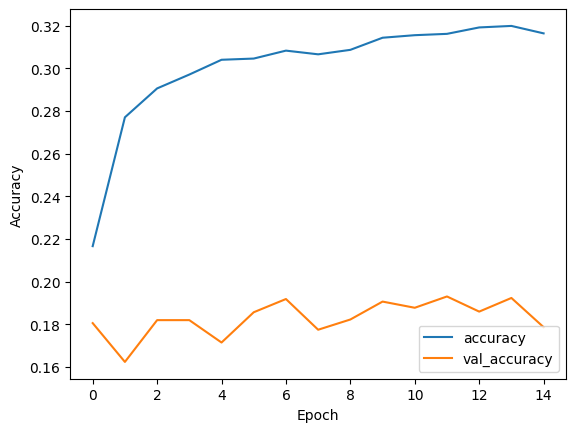

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
model.save('/content/drive/MyDrive/group_project/stored_data/ann_raw_model.h5')

## Make Predictions

#### Predictions on the raw image training set

The accuracy is 33%

In [ ]:
ali_train_preds = model.predict(np.expand_dims(ali_image_data, axis=-1))

1101/1101 [==============================] - 2s 2ms/step


In [ ]:
ali_train_pred_labels = np.array([np.argmax(i) for i in ali_train_preds])

In [ ]:
accuracy_score(ali_train_pred_labels, ali_cleaned_labels)

0.3324528516246308

In [ ]:
print(classification_report(ali_train_pred_labels, ali_cleaned_labels))

              precision    recall  f1-score   support

           0       0.33      0.64      0.44      1820
           1       0.37      0.39      0.38      3375
           2       0.17      0.24      0.20      2548
           3       0.31      0.23      0.26      4830
           4       0.15      0.38      0.22      1409
           5       0.33      0.18      0.23      6278
           6       0.49      0.53      0.51      3201
           7       0.38      0.34      0.36      3901
           8       0.46      0.32      0.38      5082
           9       0.34      0.44      0.38      2764

    accuracy                           0.33     35208
   macro avg       0.33      0.37      0.34     35208
weighted avg       0.35      0.33      0.33     35208



In [ ]:
print(confusion_matrix(ali_train_pred_labels, ali_cleaned_labels))

[[1172   23  144   16   93   26  216   45   56   29]
 [  93 1300  195  743  340  160   51   90  108  295]
 [ 306  222  606  244  438  119  247   41  225  100]
 [ 398  633  549 1092  604  392  447  230  281  204]
 [  81  133  260  207  536   10   58    5   82   37]
 [ 488  592  642  695  518 1150  375  695  610  513]
 [ 401  114  200  143  177  143 1683  130   92  118]
 [ 324  106  387  161  188  604  157 1333  222  419]
 [ 178  241  463  101  508  684  151  523 1624  609]
 [  77  157   75  125  129  244   71  444  233 1209]]


In [ ]:
pd.DataFrame(ali_train_pred_labels)[0].value_counts()

5    6278
8    5082
3    4830
7    3901
1    3375
6    3201
9    2764
2    2548
0    1820
4    1409
Name: 0, dtype: int64

#### Predictions on the fashion-MNIST training set

The accuracy score is only 18%. This is higher than the baseline expectation of 10% (i.e. random guessing)

In [ ]:
mnist_train_preds = model.predict(train_images)

1875/1875 [==============================] - 4s 2ms/step


In [ ]:
mnist_train_pred_labels = np.array([np.argmax(i) for i in mnist_train_preds])

In [ ]:
accuracy_score(mnist_train_pred_labels, train_labels)

0.17936666666666667

In [ ]:
print(classification_report(mnist_train_pred_labels, train_labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00        57
           3       0.89      0.27      0.41     19675
           4       0.00      0.00      0.00         0
           5       0.06      0.05      0.05      7643
           6       0.00      0.02      0.00       523
           7       0.85      0.16      0.27     32032
           8       0.00      0.16      0.00        25
           9       0.00      0.00      0.00        17

    accuracy                           0.18     60000
   macro avg       0.18      0.07      0.07     60000
weighted avg       0.75      0.18      0.28     60000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(confusion_matrix(mnist_train_pred_labels, train_labels))

[[   0    0    0    0    0    3    0    2    0    0]
 [   7    0    5    1    5    0    3    0    2    0]
 [   0    0    0    0    0   49    0    8    0    0]
 [4937 4347  843 5310  705  530 2347  277  181  198]
 [   0    0    0    0    0    0    0    0    0    0]
 [ 697 1635 1160  437  890  363 1314  617  231  299]
 [  11    1   28   38    7  366    9   19   42    2]
 [ 335   17 3962  213 4390 4678 2323 5076 5537 5501]
 [  11    0    1    1    2    2    4    0    4    0]
 [   2    0    1    0    1    9    0    1    3    0]]


In [ ]:
pd.DataFrame(mnist_train_pred_labels)[0].value_counts()

7    32032
3    19675
5     7643
6      523
2       57
8       25
1       23
9       17
0        5
Name: 0, dtype: int64

#### Predictions on the Fashion-MNIST testing dataset

Accuracy is 18%

In [ ]:
mnist_test_preds = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
mnist_test_pred_labels = np.array([np.argmax(i) for i in mnist_test_preds])

In [ ]:
accuracy_score(mnist_test_pred_labels, test_labels)

0.1786

In [ ]:
print(classification_report(mnist_test_pred_labels, test_labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         6
           3       0.87      0.27      0.41      3272
           4       0.00      0.00      0.00         0
           5       0.06      0.04      0.05      1272
           6       0.00      0.03      0.00        80
           7       0.85      0.16      0.27      5352
           8       0.00      0.00      0.00         3
           9       0.00      0.20      0.00         5

    accuracy                           0.18     10000
   macro avg       0.18      0.07      0.07     10000
weighted avg       0.75      0.18      0.28     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(confusion_matrix(mnist_test_pred_labels, test_labels))

[[  0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   2   2   3   0   1   0]
 [  0   0   0   0   0   4   0   2   0   0]
 [808 741 131 874 109  98 399  48  33  31]
 [  0   0   0   0   0   0   0   0   0   0]
 [112 256 217  84 152  55 215  94  43  44]
 [  0   0   1   2   1  59   2   2  13   0]
 [ 76   3 651  39 736 780 380 854 909 924]
 [  2   0   0   0   0   0   1   0   0   0]
 [  0   0   0   1   0   2   0   0   1   1]]


In [ ]:
pd.DataFrame(mnist_test_pred_labels)[0].value_counts(normalize=True)

7    0.5352
3    0.3272
5    0.1272
6    0.0080
1    0.0010
2    0.0006
9    0.0005
8    0.0003
Name: 0, dtype: float64

#### Load saved artificial NN model

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/ADS_504_machine_learning/group_project/stored_data/ann_raw_model.h5")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 128)               524416    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 525,706
Trainable params: 525,706
Non-trainable params: 0
_________________________________________________________________


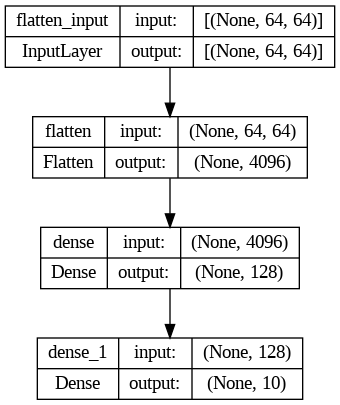

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [10]:
ali_cleaned_labels.shape

(35208,)